In [14]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.1 --progress-bar off
!pip install -qqq transformers==4.34.1 --progress-bar off
!pip install -qqq accelerate==0.23.0 --progress-bar off
!pip install -qqq bitsandbytes==0.41.1 --progress-bar off
!pip install -qqq llava-torch==1.1.1 --progress-bar off

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.


In [ ]:
import textwrap
from io import BytesIO

import requests
import torch
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import SeparatorStyle, conv_templates
from llava.mm_utils import (
    KeywordsStoppingCriteria,
    get_model_name_from_path,
    process_images,
    tokenizer_image_token,
)
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from PIL import Image

[2024-02-06 23:29:04,027] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:
from transformers import BitsAndBytesConfig

In [ ]:
disable_torch_init()

In [ ]:
MODEL = "4bit/llava-v1.5-13b-3GB"
model_name = get_model_name_from_path(MODEL)
model_name

'llava-v1.5-13b-3GB'

In [ ]:
!gdown 1mp5rAo4-apdl0DJO5XXQhjMa2ja7IFEH
!gdown 1Qnutc8S7F6jMN6RkJZBgiAePymDcJ3Ii
!gdown 1XM7QgiuNj7KjapaEfjyfxMVWSdQaqsaH
!gdown 1m9v8EVZ16sYcUlCGUH8PFuLxFxaml90U
!gdown 1x7XtPRG-IbSxyCO-ZTo_P7jirwRFY-JN

Downloading...
From: https://drive.google.com/uc?id=1mp5rAo4-apdl0DJO5XXQhjMa2ja7IFEH
To: /content/btc-price-chart.png
100% 133k/133k [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qnutc8S7F6jMN6RkJZBgiAePymDcJ3Ii
To: /content/meme.jpeg
100% 109k/109k [00:00<00:00, 81.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XM7QgiuNj7KjapaEfjyfxMVWSdQaqsaH
To: /content/captcha.jpeg
100% 4.52k/4.52k [00:00<00:00, 19.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1m9v8EVZ16sYcUlCGUH8PFuLxFxaml90U
To: /content/bitcoin-paper.jpg
100% 945k/945k [00:00<00:00, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x7XtPRG-IbSxyCO-ZTo_P7jirwRFY-JN
To: /content/bike-girl.jpeg
100% 207k/207k [00:00<00:00, 107MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1PGrnfeM0mijvRl6A_Hb6unGlbiIDBZVS

Downloading...
From: https://drive.google.com/uc?id=1PGrnfeM0mijvRl6A_Hb6unGlbiIDBZVS
To: /content/WhatsApp Image 2024-01-22 at 00.53.04_01bfde19.jpg
100% 125k/125k [00:00<00:00, 98.1MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1PLGzkr8LqjxUtb53DayDX7vUmvD-tSAl

Downloading...
From: https://drive.google.com/uc?id=1PLGzkr8LqjxUtb53DayDX7vUmvD-tSAl
To: /content/shun-idota-cekJ1XXx1Rk-unsplash.jpg
100% 5.71M/5.71M [00:00<00:00, 204MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1_vTMisL_Ugtzrmh5ljCUCqhvAySskLce

Downloading...
From: https://drive.google.com/uc?id=1_vTMisL_Ugtzrmh5ljCUCqhvAySskLce
To: /content/highways.jpeg
100% 45.3k/45.3k [00:00<00:00, 83.3MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1O9B2WiMM91DuCUg9D35ULoD30Rc1oWLu

Downloading...
From: https://drive.google.com/uc?id=1O9B2WiMM91DuCUg9D35ULoD30Rc1oWLu
To: /content/download.jpg
100% 6.58k/6.58k [00:00<00:00, 24.7MB/s]


In [ ]:
bnb_config=BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    llm_int8_skip_modules=["lm_head", "embed_tokens"],
)

In [ ]:
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=MODEL, model_base=None, model_name=model_name, load_4bit=True,
    #quantization_config=bnb_config
)

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
def load_image(image_file):
    if image_file.startswith("http://") or image_file.startswith("https://"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image

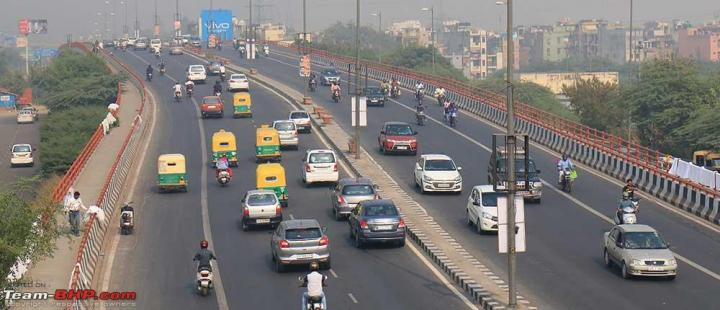

In [ ]:
image = load_image("/content/highways.jpeg")
image

In [ ]:
def process_image(image):
    args = {"image_aspect_ratio": "pad"}
    image_tensor = process_images([image], image_processor, args)
    return image_tensor.to(model.device, dtype=torch.float16)

In [ ]:
processed_image = process_image(image)
type(processed_image), processed_image.shape

(torch.Tensor, torch.Size([1, 3, 336, 336]))

In [ ]:
CONV_MODE = "llava_v0"

In [ ]:
def create_prompt(prompt: str):
    conv = conv_templates[CONV_MODE].copy()
    roles = conv.roles
    prompt = DEFAULT_IMAGE_TOKEN + "\n" + prompt
    conv.append_message(roles[0], prompt)
    conv.append_message(roles[1], None)
    return conv.get_prompt(), conv

In [ ]:
prompt, _ = create_prompt("Describe the image")
print(prompt)

A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
Describe the image###Assistant:


In [ ]:
def ask_image(image: Image, prompt: str):
    image_tensor = process_image(image)
    prompt, conv = create_prompt(prompt)
    input_ids = (
        tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
        .unsqueeze(0)
        .to(model.device)
    )

    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    stopping_criteria = KeywordsStoppingCriteria(
        keywords=[stop_str], tokenizer=tokenizer, input_ids=input_ids
    )

    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=image_tensor,
            do_sample=True,
            temperature=0.01,
            max_new_tokens=512,
            use_cache=True,
            stopping_criteria=[stopping_criteria],
        )
    return tokenizer.decode(
        output_ids[0, input_ids.shape[1] :], skip_special_tokens=True
    ).strip()

In [ ]:
%%time
result = ask_image(image, "Describe the image")
print(textwrap.fill(result, width=110))

The image depicts a busy city street filled with various vehicles, including cars, motorcycles, and buses.
There are multiple cars of different sizes, some of which are driving in the same direction, while others are
moving in the opposite direction. A few motorcycles can be seen among the cars, adding to the bustling
atmosphere of the street.  In addition to the cars and motorcycles, there are several buses present on the
street, likely providing public transportation for the city's residents. The street is also lined with trees,
adding a touch of greenery to the urban environment.  A group of people can be seen walking or standing on the
sidewalk, likely pedestrians going about their daily activities. The overall scene captures the essence of a
busy city street, with a mix of vehicles and pedestrians navigating their way through the urban landscape.
CPU times: user 20.8 s, sys: 563 ms, total: 21.3 s
Wall time: 26 s


In [ ]:
%%time
result = ask_image(image, "is everyone wearing helmet?")
print(textwrap.fill(result, width=110))

No, not everyone is wearing a helmet. In the image, there are people riding motorcycles and cars, but not all
of them are wearing helmets. It is important for motorcyclists and car drivers to wear helmets for safety
purposes, as they can significantly reduce the risk of head injuries in case of an accident.
CPU times: user 9.12 s, sys: 357 ms, total: 9.47 s
Wall time: 10.8 s


In [ ]:
%%time
result = ask_image(
    image,
    "is it day or night?",
)
print(textwrap.fill(result, width=110))

It is daytime in the image.
CPU times: user 1.62 s, sys: 215 ms, total: 1.83 s
Wall time: 3.58 s


In [ ]:
img2=load_image("/content/chd-parking.jpg")
img2_processed=process_image(img2)

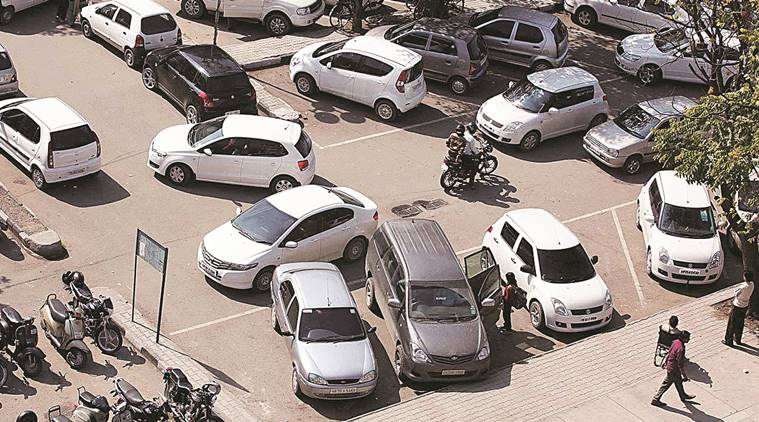

In [ ]:
img2

In [ ]:
prompt, _ = create_prompt("Describe the image")
print(prompt)

A chat between a curious human and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the human's questions.###Human: <image>
Describe the image###Assistant:


In [ ]:
%%time
result = ask_image(img2, "Describe the image")
print(textwrap.fill(result, width=110))

The image depicts a busy street filled with numerous cars and a motorcycle. The cars are parked in a parking
lot, occupying most of the street. There are at least 13 cars visible in the scene, with some parked closer to
the foreground and others further back. The motorcycle is located near the center of the scene, adding to the
overall traffic.  In addition to the vehicles, there are two people in the scene. One person is standing near
the right side of the image, while the other person is located closer to the center. The presence of these
individuals suggests that they might be pedestrians or drivers navigating the busy street.
CPU times: user 15.9 s, sys: 184 ms, total: 16.1 s
Wall time: 17 s


In [ ]:
%%time
result = ask_image(img2, "Are all cars parked correctly?")
print(textwrap.fill(result, width=110))

Yes, all cars are parked correctly in their designated parking spaces.
CPU times: user 2.82 s, sys: 201 ms, total: 3.02 s
Wall time: 3.81 s


In [ ]:
%%time
result = ask_image(img2, "Correctly parked cars are those on side of the road, are all cars parked correctly?")
print(textwrap.fill(result, width=110))

In the image, there are several cars parked on the side of the road, and they appear to be correctly parked.
However, there is also a motorcycle parked in the middle of the street, which is not a correct parking
location. Motorcycles should be parked in designated areas or on the side of the road, not in the middle of
the street, to avoid obstructing traffic and ensuring the safety of all road users.
CPU times: user 11.6 s, sys: 382 ms, total: 12 s
Wall time: 13.7 s


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown https://drive.google.com/uc?id=1qO31iM9nPIvf1KRVnWC4JdoMkvZRERAw

Downloading...
From: https://drive.google.com/uc?id=1qO31iM9nPIvf1KRVnWC4JdoMkvZRERAw
To: /content/WhatsApp Image 2024-02-07 at 03.39.26_c3b47c09.jpg
100% 283k/283k [00:00<00:00, 96.8MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1qHAqKp35twlfY-UKga6pdDhV6ds87hIJ

Downloading...
From: https://drive.google.com/uc?id=1qHAqKp35twlfY-UKga6pdDhV6ds87hIJ
To: /content/WhatsApp Image 2024-02-07 at 03.38.12_7a235b25.jpg
100% 127k/127k [00:00<00:00, 44.7MB/s]


In [ ]:
img3=load_image("/content/WhatsApp Image 2024-02-07 at 03.38.12_7a235b25.jpg")
img3_processed=process_image(img3)

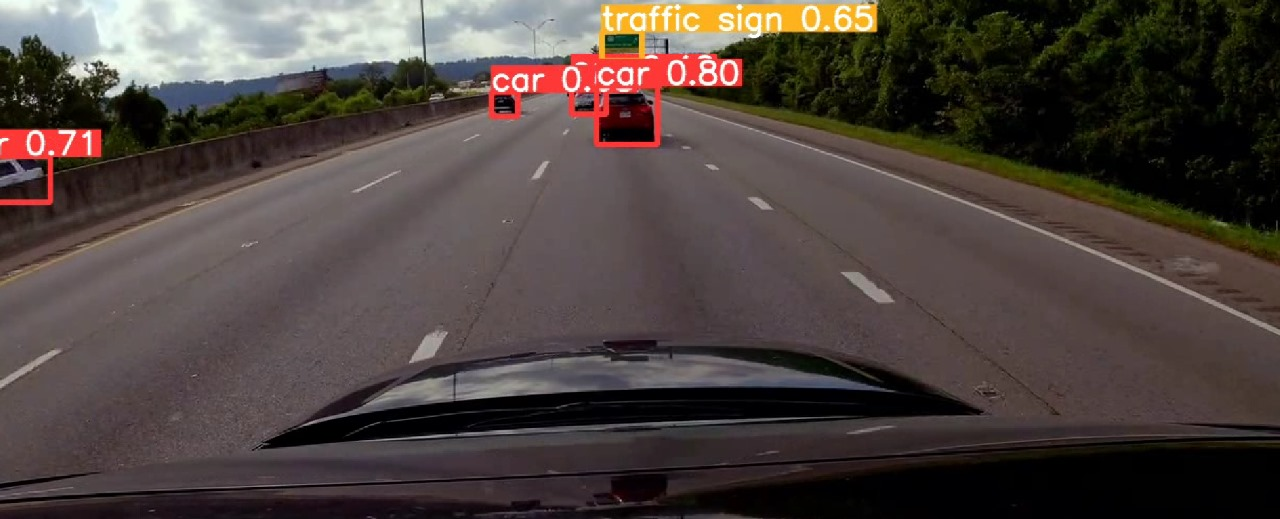

In [ ]:
img3

In [ ]:
%%time
result = ask_image(img3, "Describe the image")
print(textwrap.fill(result, width=110))

The image shows a busy highway with multiple cars driving down the road. There are at least six cars visible
in the scene, with some positioned closer to the foreground and others further away. The cars are moving in
various directions, indicating a bustling traffic environment.  In addition to the cars, there are two traffic
lights visible in the scene, one near the center and the other towards the right side of the image. These
traffic lights help regulate the flow of traffic on the highway. The overall atmosphere of the image suggests
a typical day on a busy highway with cars and traffic lights in place to manage the flow of vehicles.
CPU times: user 16.7 s, sys: 291 ms, total: 16.9 s
Wall time: 20.2 s


In [ ]:
%%time
result = ask_image(img2, "Red boxes in the image show cars and yellow box shows traffic sign. How many cars and traffic signs are here?")
print(textwrap.fill(result, width=110))

In the image, there are 12 cars and 1 traffic sign.
CPU times: user 2.9 s, sys: 261 ms, total: 3.16 s
Wall time: 4.36 s


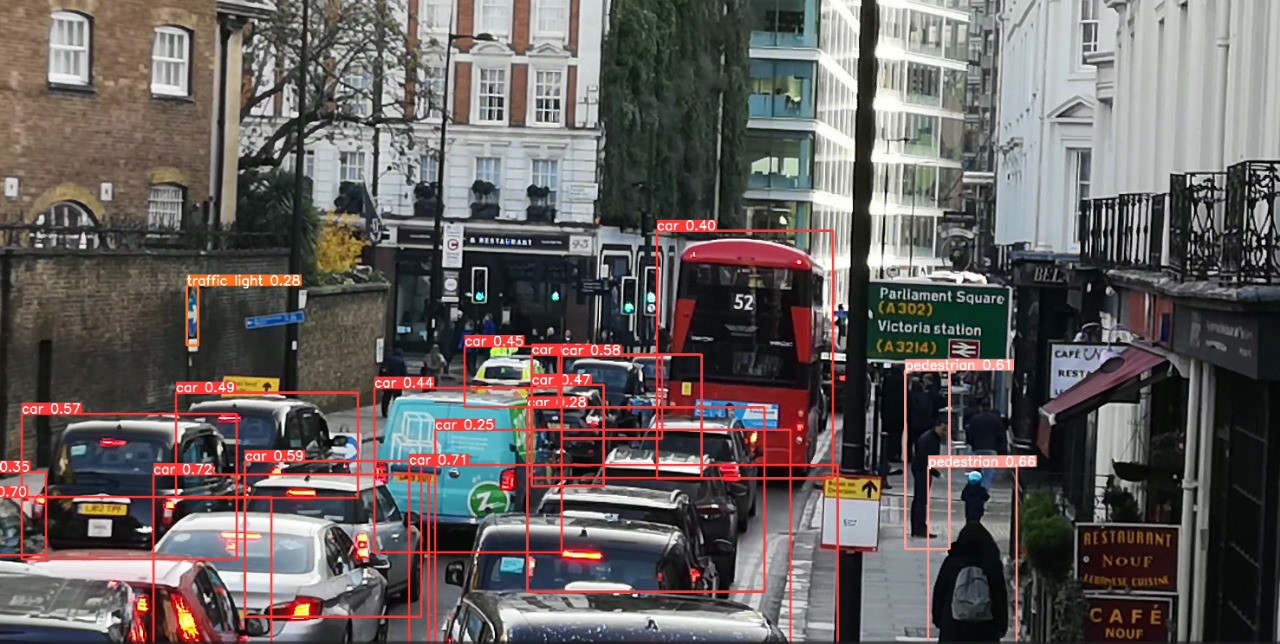

In [ ]:
img4=load_image("/content/WhatsApp Image 2024-02-07 at 03.39.26_c3b47c09.jpg")
img4

In [ ]:
%%time
result = ask_image(img3, "Describe the image")
print(textwrap.fill(result, width=110))

The image shows a busy highway with multiple cars driving down the road. There are at least six cars visible
in the scene, with some positioned closer to the foreground and others further away. The cars are moving in
various directions, indicating a bustling traffic environment.  In addition to the cars, there are two traffic
lights visible in the scene, one near the center and the other towards the right side of the image. These
traffic lights help regulate the flow of traffic and ensure the safety of drivers and passengers.
CPU times: user 12.6 s, sys: 282 ms, total: 12.8 s
Wall time: 14 s


In [ ]:
%%time
result = ask_image(img3, "Red boxes in the image show cars and yellow box shows traffic sign and pink box shows pedestrian. How many cars,traffic signs and pedestrians are here?")
print(textwrap.fill(result, width=110))

In the image, there are three cars, one traffic sign, and one pedestrian.
CPU times: user 3.35 s, sys: 265 ms, total: 3.61 s
Wall time: 4.29 s


Creating Streamlit application

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [3]:
!pip install streamlit_chat
!pip install llava

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.9 MB/s eta 0:00:00


In [5]:
!pip install torch==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [7]:
!pip install llava

In [9]:
from transformers import AutoProcessor, LlavaForConditionalGeneration
model=LlavaForConditionalGeneration(
   "bczhou/tiny-llava-v1-hf",device_map="auto",torch_dtype=torch.float16,
    #quantization_config=bnb_config
low_cpu_mem_usage=True,
).to(0)

ImportError: cannot import name 'LlavaForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

LMM API call with Replicate

In [10]:
!python -m venv venv

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/venv/bin/python3



In [11]:
!pip install streamlit
!pip install replicate
!pip install python- dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
ERROR: Invalid requirement: 'python-'


In [12]:
!pip install python-dotenv

In [21]:
!export REPLICATE_API_TOKEN=r8_2cpBOE6eWfTlZVwpdraYIWbBMJoSZ643mHoQi

In [111]:
%%writefile app.py

import streamlit as st
from streamlit_chat import message
import replicate
import os

os.environ["REPLICATE_API_TOKEN"]="r8_2cpBOE6eWfTlZVwpdraYIWbBMJoSZ643mHoQi"
#!export REPLICATE_API_TOKEN=r8_2cpBOE6eWfTlZVwpdraYIWbBMJoSZ643mHoQi

with st.sidebar:
  "Welcome to an interactive chatbot created using LLAVA (after testing flamingo's models and LLMs)"
with st.sidebar:
   temperature=st.sidebar.slider('temperature',min_value=0.01,max_value=5.0,value=0.1,step=0.01)
st.title("📝Yolov5-LlaVA Object Detection Chat!")
st.markdown("<h3 style='text-align: center; color: white;' >Built by Agam Pandey <a href='x'>Refer to https://github.com/AGAMPANDEYY/Yolov_LLM.git </a></h3>", unsafe_allow_html=True)

# calling model llava


uploaded_file=st.file_uploader("Upload the Yolov5 detection vidoe exctracted frame",type=['jpg','jpeg'])


def generate_llava_chat(prompt):


  instruction="You are an assistant. You do not respond as a 'User'.You only respond detailed answers as 'Assistant'."

  #for dict_message in st.session_state.messages:
     #if dict_message["role"]=="user":
        #if dict_message.get("type") == "image":
                #instruction += "User: [Image]\\n\\n"
        #else:
            #instruction += "User: " + dict_message["content"] + "\\n\\n"
     #else:
            #instruction += "Assistant: " + dict_message["content"] + "\\n\\n"
  output=replicate.run("yorickvp/llava-13b:e272157381e2a3bf12df3a8edd1f38d1dbd736bbb7437277c8b34175f8fce358",input={"image":uploaded_file,"prompt":prompt})
  return output

if "messages" not in st.session_state:
        st.session_state.messages = [{"role": "assistant", "content": "How may I assist you today?"}]

# Sidebar to clear chat history
def clear_chat_history():
    st.session_state.message = [{"role": "assistant", "content": "How may I assist you today?"}]

st.sidebar.button('Clear Chat History', on_click=clear_chat_history)

if "messages" not in st.session_state:
        st.session_state.messages = [{"role": "assistant", "content": "How may I assist you today?"}]

    # Display or clear chat messages
for message in st.session_state.messages:
        with st.chat_message(message["role"]):
            if message.get("type") == "image":
                st.image(message["content"])
            else:
                st.write(message["content"])



st.sidebar.button('Clear Chat History', on_click=clear_chat_history)









#container for the chat history
response_container = st.container()
#container for the user's text input
container = st.container()

if 'history' not in st.session_state:
        st.session_state['history'] = []

if 'generated' not in st.session_state:
        st.session_state['generated'] = ["Hello I am Agam's Object Detection Chatbot 🔎 ! Ask me anything about the image"]

if 'past' not in st.session_state:
        st.session_state['past'] = ["Hey ! 👋"]

with container:
        with st.form(key='my_form', clear_on_submit=True):

            prompt = st.text_input("Query:", placeholder="Enter Conversation", key='input')
            submit_button = st.form_submit_button(label='Ask!')

        if submit_button and prompt:
            # Button to send the message/image
         if uploaded_file:
            # If an image is uploaded, store it in session_state
            st.session_state.messages.append({"role": "user", "content": uploaded_file, "type": "image"})

         if prompt:
            st.session_state.messages.append({"role": "user", "content": prompt})

        # Generate a new response if the last message is not from the assistant
         if st.session_state.messages[-1]["role"] != "assistant":
            with st.chat_message("assistant"):
                with st.spinner("Thinking..."):
                    response = generate_llava_chat(prompt)
                    placeholder = st.empty()
                    full_response = ''
                    for item in response:
                        full_response += item
                        placeholder.markdown(full_response)
                    placeholder.markdown(full_response)
            message = {"role": "assistant", "content": full_response}
            st.session_state.messages.append(message)
            output = generate_llava_chat(prompt)
            st.session_state['past'].append(prompt)
            st.session_state['generated'].append(output)

if st.session_state['generated']:
        with response_container:
           for i in range(len(st.session_state['generated'])):
                #message(st.session_state["past"][i], is_user=True, key=str(i) + '_user', avatar_style="big-smile")
                #message(st.session_state["generated"][i], key=str(i), avatar_style="thumbs")



Overwriting app.py


In [199]:
%%writefile app2.py

import streamlit as st
import replicate
from dotenv import load_dotenv
import os


os.environ["REPLICATE_API_TOKEN"]="r8_2cpBOE6eWfTlZVwpdraYIWbBMJoSZ643mHoQi"

st.set_page_config("👀Yolov5-🦙Llava13b VisualQA")

with st.sidebar:
  "Welcome to an interactive chatbot created using LLAVA (after testing flamingo's models and LLMs)"
with st.sidebar:
   temperature=st.sidebar.slider('temperature',min_value=0.01,max_value=5.0,value=0.1,step=0.01)
st.title("📝Yolov5-LlaVA Object Detection Chat!")
st.markdown("<h3 style='text-align: center; color: white;' >Built by Agam Pandey <a href='x'>Refer to https://github.com/AGAMPANDEYY/Yolov_LLM.git </a></h3>", unsafe_allow_html=True)

# Function to generate LLaMA2 response
def generate_llava_response(prompt_input):
    llm = 'yorickvp/llava-13b:2facb4a474a0462c15041b78b1ad70952ea46b5ec6ad29583c0b29dbd4249591'
    string_dialogue = "You are a helpful assistant. You do not respond as 'User' or pretend to be 'User'. You only respond once as 'Assistant'."
    for dict_message in st.session_state.messages:
        if dict_message["role"] == "user":
            if dict_message.get("type") == "image":
                string_dialogue += "User: [Image]\\n\\n"
            else:
                string_dialogue += "User: " + dict_message["content"] + "\\n\\n"
        else:
            string_dialogue += "Assistant: " + dict_message["content"] + "\\n\\n"
    output = replicate.run(llm,
                        input={"image": uploaded_file, "prompt": prompt})
    return output



uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

    # Ensure session state for messages if it doesn't exist
if "messages" not in st.session_state:
        st.session_state.messages = [{"role": "assistant","avatar":'🦙', "content": "Welcome to Object detection Chatbot, how may i help?"}]

    # Display or clear chat messages
for message in st.session_state.messages:
        with st.chat_message(message["role"],avatar="🦙"):
            if message.get("type") == "image":
                st.image(message["content"])
            else:
                st.write(message["content"])

    # Sidebar to clear chat history
def clear_chat_history():
        st.session_state.messages = [{"role": "assistant", "content": "Welcome to Object detection Chatbot, how may i help?"}]

st.sidebar.button('Clear Chat History', on_click=clear_chat_history)

    # Text input for chat

#container for the chat history
response_container = st.container()
#container for the user's text input
container = st.container()

with container:
  with st.form(key='my_form', clear_on_submit=True):

       prompt = st.text_input("Query:", placeholder="Enter Conversation", key='input')
       submit_button = st.form_submit_button(label='Ask!')

       if submit_button and prompt:
             # Button to send the message/image
          if uploaded_file:
            # If an image is uploaded, store it in session_state
            st.session_state.messages.append({"role": "user", "content": uploaded_file, "type": "image"})

          if prompt:
            st.session_state.messages.append({"role": "user", "content": prompt})

          if st.session_state.messages[-1]["role"] != "assistant":
            with st.chat_message("assistant",avatar="🦙"):
                with st.spinner("Thinking..."):
                    response = generate_llava_response(prompt)
                    placeholder = st.empty()
                    full_response = ''
                    for item in response:
                        full_response += item
                        placeholder.markdown(full_response)
                    placeholder.markdown(full_response)
            message = {"role": "assistant", "content": full_response}
            st.session_state.messages.append(message)





Overwriting app2.py


In [ ]:
         with st.chat_message("assistant"):
                with st.spinner("Thinking..."):
                    response = generate_llava_response(prompt)
                    placeholder = st.empty()
                    full_response = ''
                    for item in response:
                        full_response += item
                        placeholder.markdown(full_response)
                    placeholder.markdown(full_response)
            message = {"role": "assistant", "content": full_response}
            st.session_state.messages.append(message)

In [ ]:
   with response_container:
            for i in range(len(st.session_state['generated'])):
                message(st.session_state["past"][i], is_user=True, key=str(i) + '_user', avatar_style="big-smile")
                message(st.session_state["generated"][i], key=str(i), avatar_style="thumbs")

In [ ]:
# Generate a new response if the last message is not from the assistant


In [ ]:
!pip install streamlit
!pip install -qqq llava-torch==1.1.1 --progress-bar off

In [ ]:
!pip install -q torch==1.4.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html

In [ ]:
!pip install transformers==4.8.0

In [15]:
!pip install pyngrok

In [16]:
from pyngrok import ngrok
!ngrok authtoken 2ZJryUwqeA0s90TEO5DYQJKeIBL_3HcvacvsFCwxbWkPWGoBc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [200]:
!nohup streamlit run app2.py &

nohup: appending output to 'nohup.out'


In [201]:
url=ngrok.connect(8501)
url

<NgrokTunnel: "https://fcdb-34-171-31-11.ngrok-free.app" -> "http://localhost:8501">

In [202]:
!streamlit run --server.port 8051 app2.py >/dev/null

Alternatively to speed up the process of model download and response, Replicate' API for Llava can be used